In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Importing Dataset

In [3]:
df=pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

- Dataset has 32560 rows and 15 columns.

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#Checking Null Values

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There are no null values

In [8]:
import re,string
from sklearn.impute import SimpleImputer
a=[]
for i in range(df.shape[1]-1):
  if df.iloc[:,i].dtypes=="object":
      for j in df.iloc[:,i].unique():
        r=re.compile(f'[{string.ascii_uppercase + string.ascii_lowercase}]')
        reg = re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
        if(reg.search(j) != None) and (r.search(j) == None):
          print(j)
          imp=SimpleImputer(missing_values=j,strategy="most_frequent")
          df.iloc[:,i]=imp.fit_transform(df.iloc[:,i].values.reshape(-1,1))


 ?
 ?
 ?


- Check if column contain only special symbol ("?") as value and replace it with mode in object column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Visualization

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


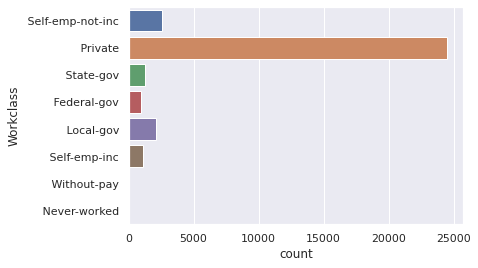

In [ ]:
sns.countplot(y=df["Workclass"])
print(df["Workclass"].value_counts())

Workclass of population 
 - Private           -  24532
 - Self-emp-not-inc   -  2541
 - Local-gov           - 2093
 - State-gov           - 1297
 - Self-emp-inc        - 1116
 - Federal-gov         -  960
 - Without-pay          -  14
 - Never-worked          -  7

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


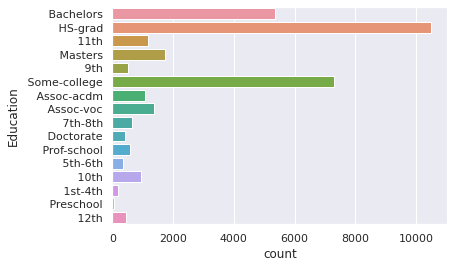

In [ ]:
sns.countplot(y=df["Education"])
print(df["Education"].value_counts())

Education of the population
- HS-grad         - 10501
- Some-college -    7291
- Bachelors     -   5354
- Masters        -  1723
- Assoc-voc       - 1382
- 11th       -      1175
- Assoc-acdm  -     1067
- 10th         -     933
- 7th-8th       -    646
- Prof-school    -   576
- 9th             -  514
- 12th             - 433
- Doctorate  -       413
- 5th-6th     -      333
- 1st-4th      -     168
- Preschool     -     51

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


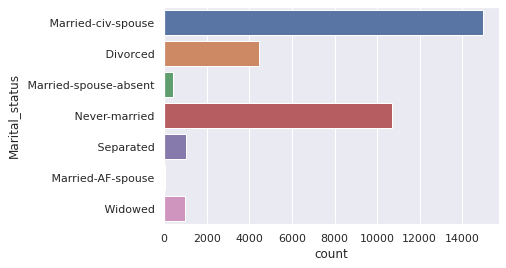

In [ ]:
sns.countplot(y=df["Marital_status"])
print(df["Marital_status"].value_counts())

Marital Status of the population
- Married-civ-spouse  -     14976
- Never-married        -    10682
- Divorced              -    4443
- Separated              -   1025
- Widowed                 -   993
- Married-spouse-absent    -  418
- Married-AF-spouse         -  23

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


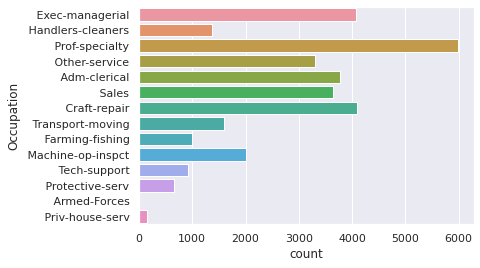

In [ ]:
sns.countplot(y=df["Occupation"])
print(df["Occupation"].value_counts())

Occupation
- Prof-specialty      - 5983
- Craft-repair      -   4099
- Exec-managerial    -  4066
- Adm-clerical       -  3769
- Sales             -   3650
- Other-service      -  3295
- Machine-op-inspct   - 2002
- Transport-moving -    1597
- Handlers-cleaners -   1370
- Farming-fishing    -   994
- Tech-support        -  928
- Protective-serv      - 649
- Priv-house-serv    -   149
- Armed-Forces        -    9

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


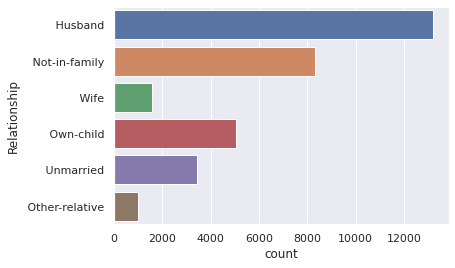

In [ ]:
sns.countplot(y=df["Relationship"])
print(df["Relationship"].value_counts())

Relationship
- Husband           - 13193
- Not-in-family     - 8304
- Own-child         - 5068
- Unmarried         - 3446
- Wife              - 1568
- Other-relative    -  981

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


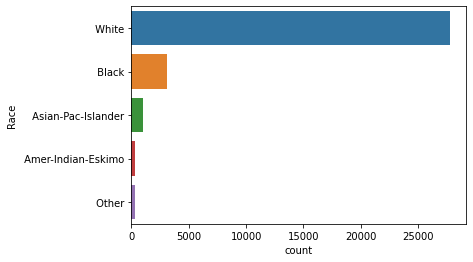

In [ ]:
sns.countplot(y=df["Race"])
print(df["Race"].value_counts())

Race 
- White                 - 27815
- Black                  - 3124
- Asian-Pac-Islander     - 1039
- Amer-Indian-Eskimo      - 311
- Other                   - 271

 Male      21789
 Female    10771
Name: Sex, dtype: int64


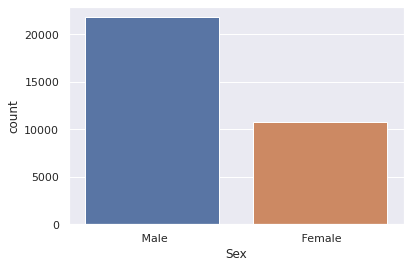

In [ ]:
sns.countplot(df["Sex"])
print(df["Sex"].value_counts())

Sex of the population
- Male     - 21789
- Female   - 10771

 United-States                 29169
 Mexico                          643
Other                            583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

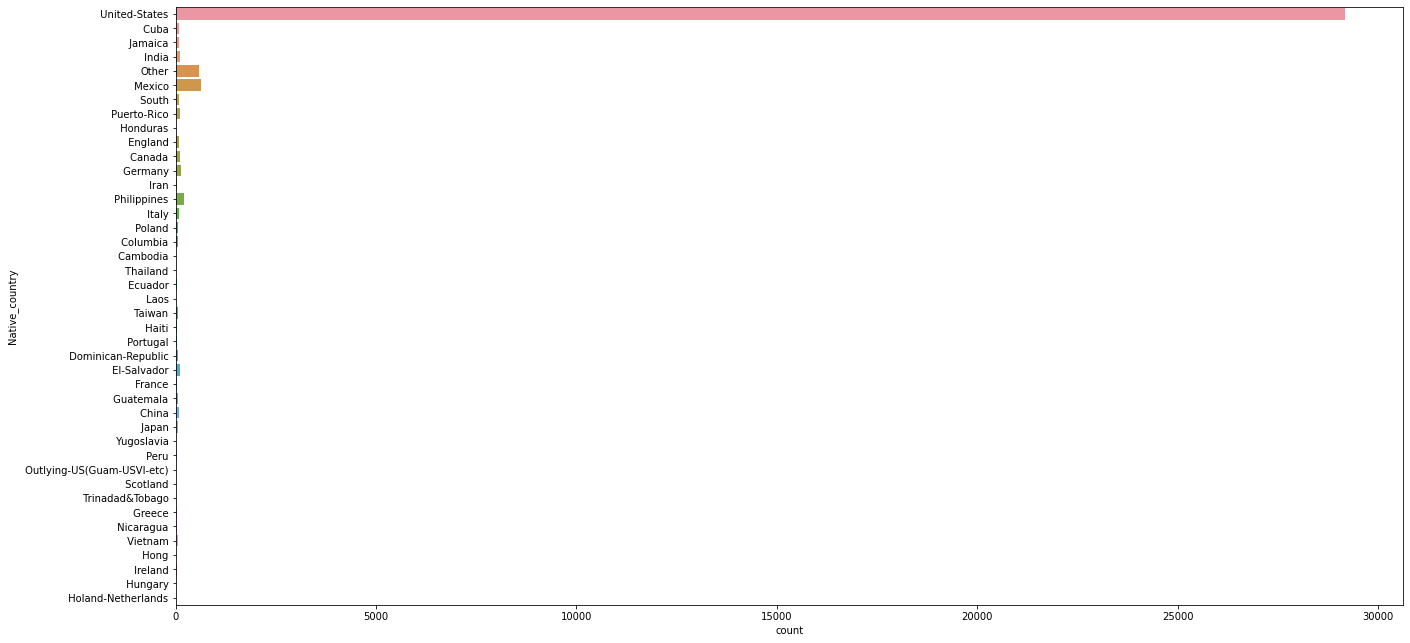

In [ ]:
plt.figure(figsize=(22,11))
sns.countplot(y=df["Native_country"])
print(df["Native_country"].value_counts())

- America is native country of majority of population
- Holand_Netherland is least native country among the population.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


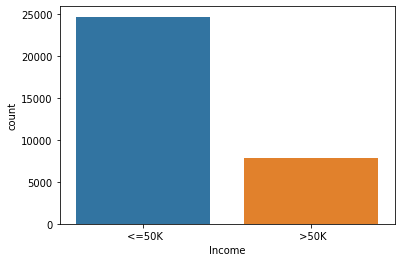

In [ ]:
sns.countplot(df["Income"])
print(df["Income"].value_counts())

Income
- <=50K    - 24719
- >50K     - 7841

Text(0, 0.5, 'Hours_per_week')

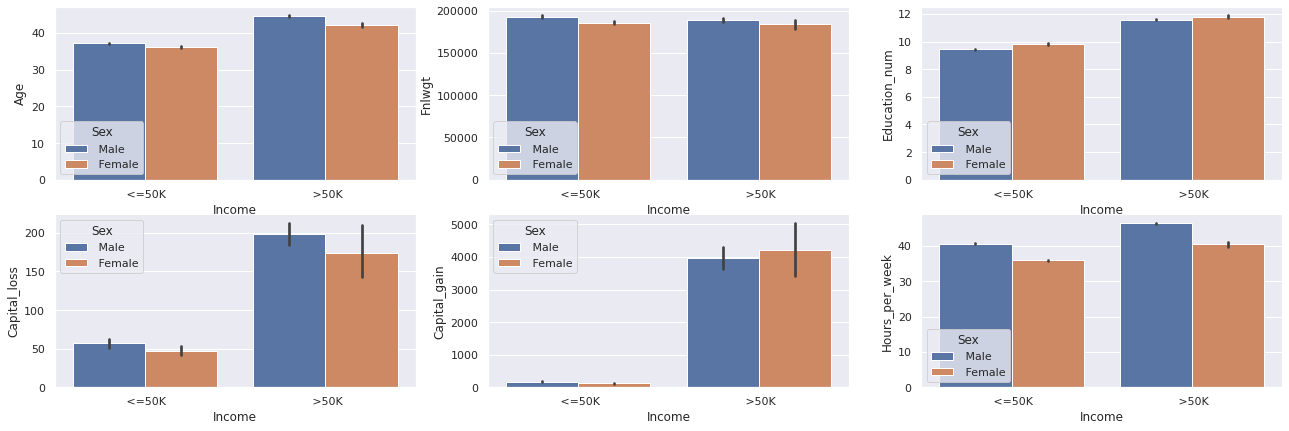

In [ ]:
sns.set()
fig,axes=plt.subplots(2,3,figsize=(22,7))
sns.barplot(x="Income",y="Age",hue="Sex",data=df,ax=axes[0,0])
axes[0,0].set_ylabel("Age")
sns.barplot(x="Income",y="Fnlwgt",hue="Sex",data=df,ax=axes[0,1])
axes[0,1].set_ylabel("Fnlwgt")
sns.barplot(x="Income",y="Education_num",hue="Sex",data=df,ax=axes[0,2])
axes[0,1].set_ylabel("Fnlwgt")
sns.barplot(x="Income",y="Capital_loss",hue="Sex",data=df,ax=axes[1,0])
axes[1,0].set_ylabel("Capital_loss")
sns.barplot(x="Income",y="Capital_gain",hue="Sex",data=df,ax=axes[1,1])
axes[1,1].set_ylabel("Capital_gain")
sns.barplot(x="Income",y="Hours_per_week",hue="Sex",data=df,ax=axes[1,2])
axes[1,2].set_ylabel("Hours_per_week")

Age
- Male earn higher income than female for income<=50k and income>50k

Fnlwgt
- For Male it is higher than female for income<=50k and income>50k

Education_num
- Female Education_num is higher than male for income<=50k and income>50k

Capital_loss
- For Male it is higher than female for income<=50k and income>50k

Capital_gain
- For Male it is higher than female for income<=50k and vice-versa is true for income>50k

Hours_per_week
- For Male it is higher than female for income<=50k and income>50k

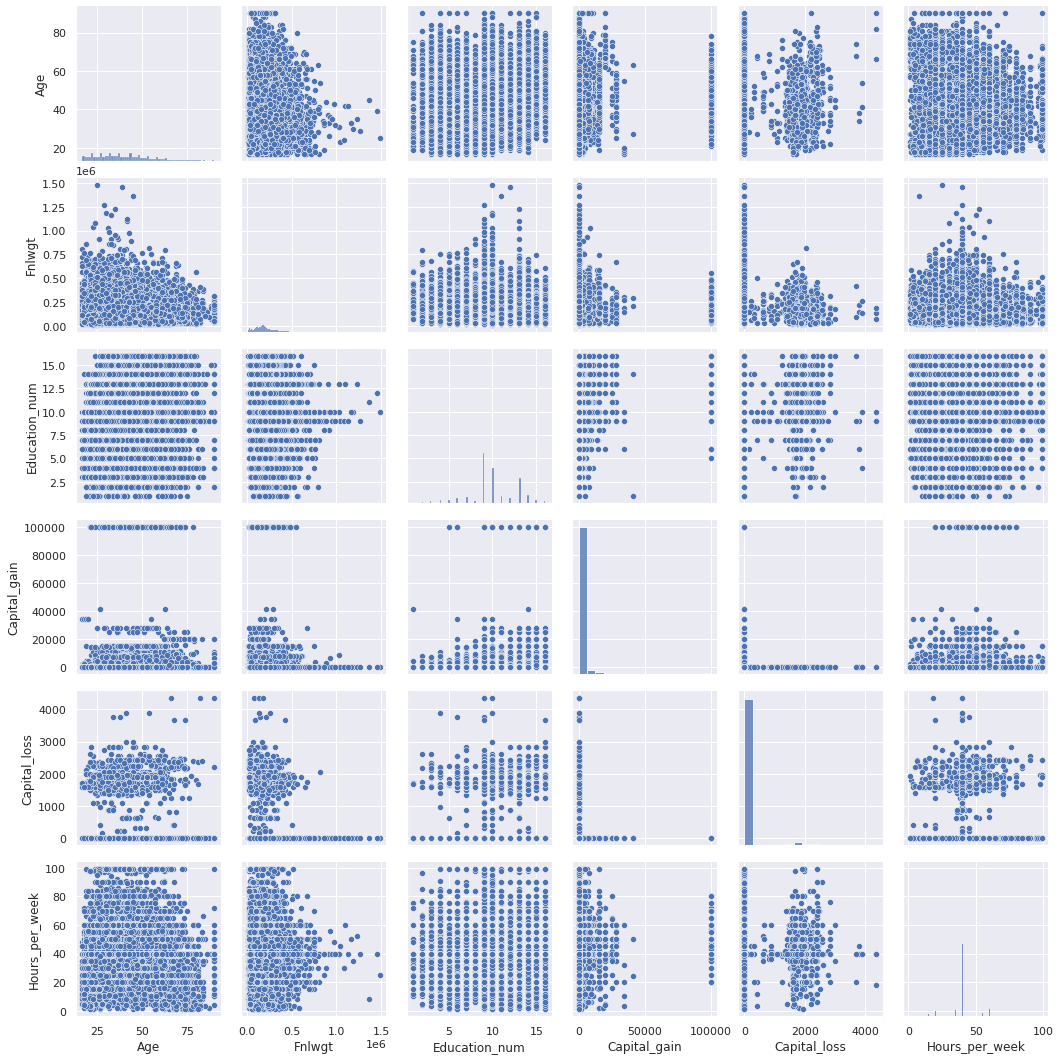

In [ ]:
sns.pairplot(df)

# Describing data

In [ ]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in PassengerId, Fare and Age compared to other features.

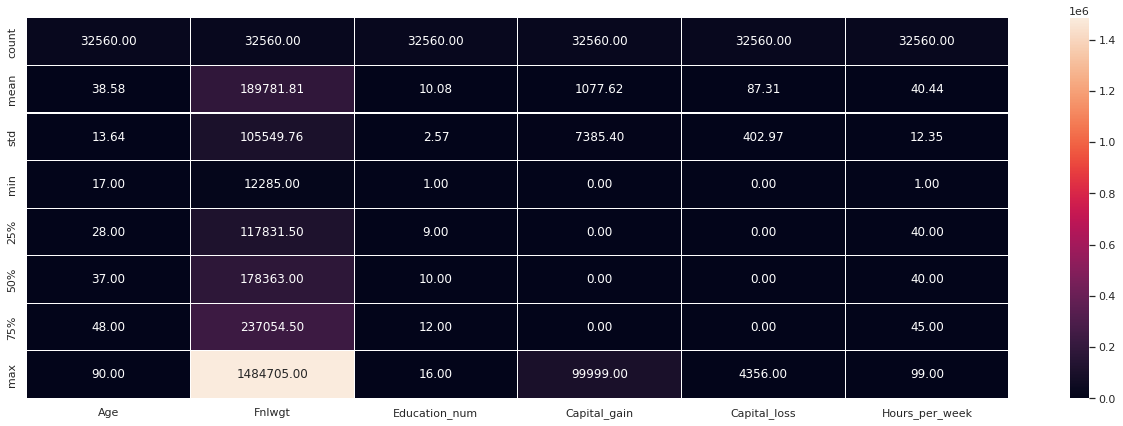

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

Age		
- mean -	38.581634	
- std	- 13.640642	
- min	- 17.000000
- max	- 90.000000	

Fnlwgt
- mean -	1.897818e+05	
- std	- 1.055498e+05	
- min	- 1.228500e+04	
- max	- 1.484705e+06	

Education_num	
- mean -	10.080590	
- std	- 	2.572709	
- min	- 1.000000	
- max	- 	16.000000	

Capital_gain
- mean -	1077.615172	
- std	- 7385.402999	
- min	- 0.000000	
- max	- 99999.000000	

Capital_loss	
- mean -	87.306511
- std	- 402.966116
- min	- 0.000000	
- max	- 4356.000000	

Hours_per_week
- mean - 40.437469
- std	- 12.347618
- min	- 1.000000
- max	- 99.000000


# Encoding Categorical Features

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
list1=[]
for i in range(df.shape[1]):
  if df.iloc[:,i].dtypes=="O":
    list1.append(df.columns[i])

for i in list1:
  df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


# Checking Correlation

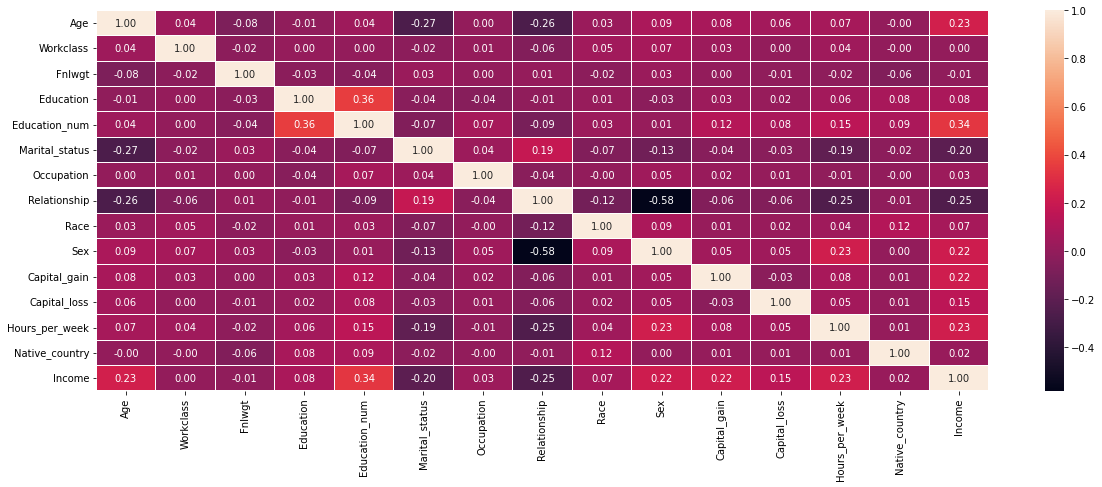

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="white",fmt=".2f")

- Age has 23 percent correlation with target column which is considered as a weak +ve bond.
- Workclass has 5 percent correlation with target column which is considered as a very weak +ve bond.
- Fnlwgt has -1 percent correlation with target column which is considered as a very weak -ve bond.
- Education has 8 percent correlation with target column which is considered as a very weak +ve bond.
- Education_num has 34 percent correlation with target column which is considered as a weak +ve bond.
- Marital_status has -20 percent correlation with target column which is considered as a strong -ve bond.
- Occupation has 8 percent correlation with target column which is considered as a very weak +ve bond.
- Relationship has -25 percent correlation with target column which is considered as a strong -ve bond.
- Race has 7 percent correlation with target column which is considered as a very weak +ve bond.
- Sex has 22 percent correlation with target column which is considered as a weak +ve bond.
- Capital_gain has 22 percent correlation with target column which is considered as a weak +ve bond.
- Capital_loss has 15 percent correlation with target column which is considered as a very weak +ve bond.
- Hours_per_week has 23 percent correlation with target column which is considered as a weak +ve bond.
- Native_country has 2 percent correlation with target column which is considered as a very weak +ve bond.

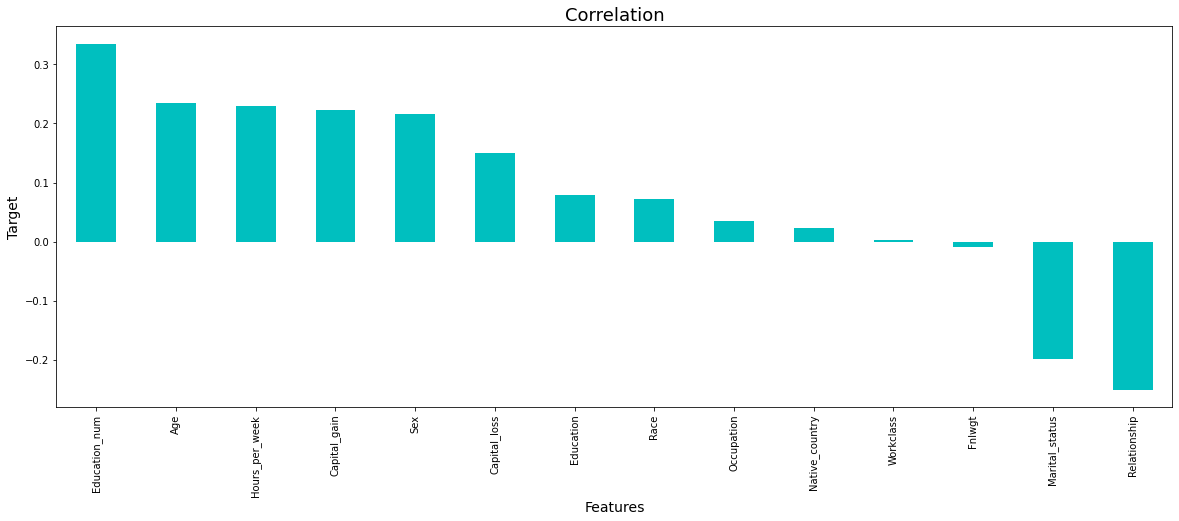

In [ ]:
plt.figure(figsize=(20,7))
df.corr()["Income"].sort_values(ascending=False).drop(["Income"]).plot(kind="bar",color="c")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Max +ve correlation : Education_num
- Min +ve correlation : Native_country
- Min -ve correlation : Fnlwgt
- Max +ve correlation : Relationship

# Separating input feature and target

In [12]:
x=df.drop(["Income"],axis=1)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38


In [13]:
y=df["Income"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

#Checking Skewness

In [14]:
x.skew().sort_values()

Native_country    -4.243083
Race              -2.435332
Education         -0.934063
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Workclass          0.076178
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Fnlwgt             1.446972
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

Keeping +/- 0.5 as the range of the skewness, the following features are skewed
- Native country
- Race
- Education
- Sex
- Age 
- Relationship            
- Fnlwgt         
- url                   
- Capital gain        
- Capital loss             

From above list only Age, Capital gain, Capital loss  and Fnlwgt are non categorical, hence we can remove skewness.

Text(0, 0.5, '')

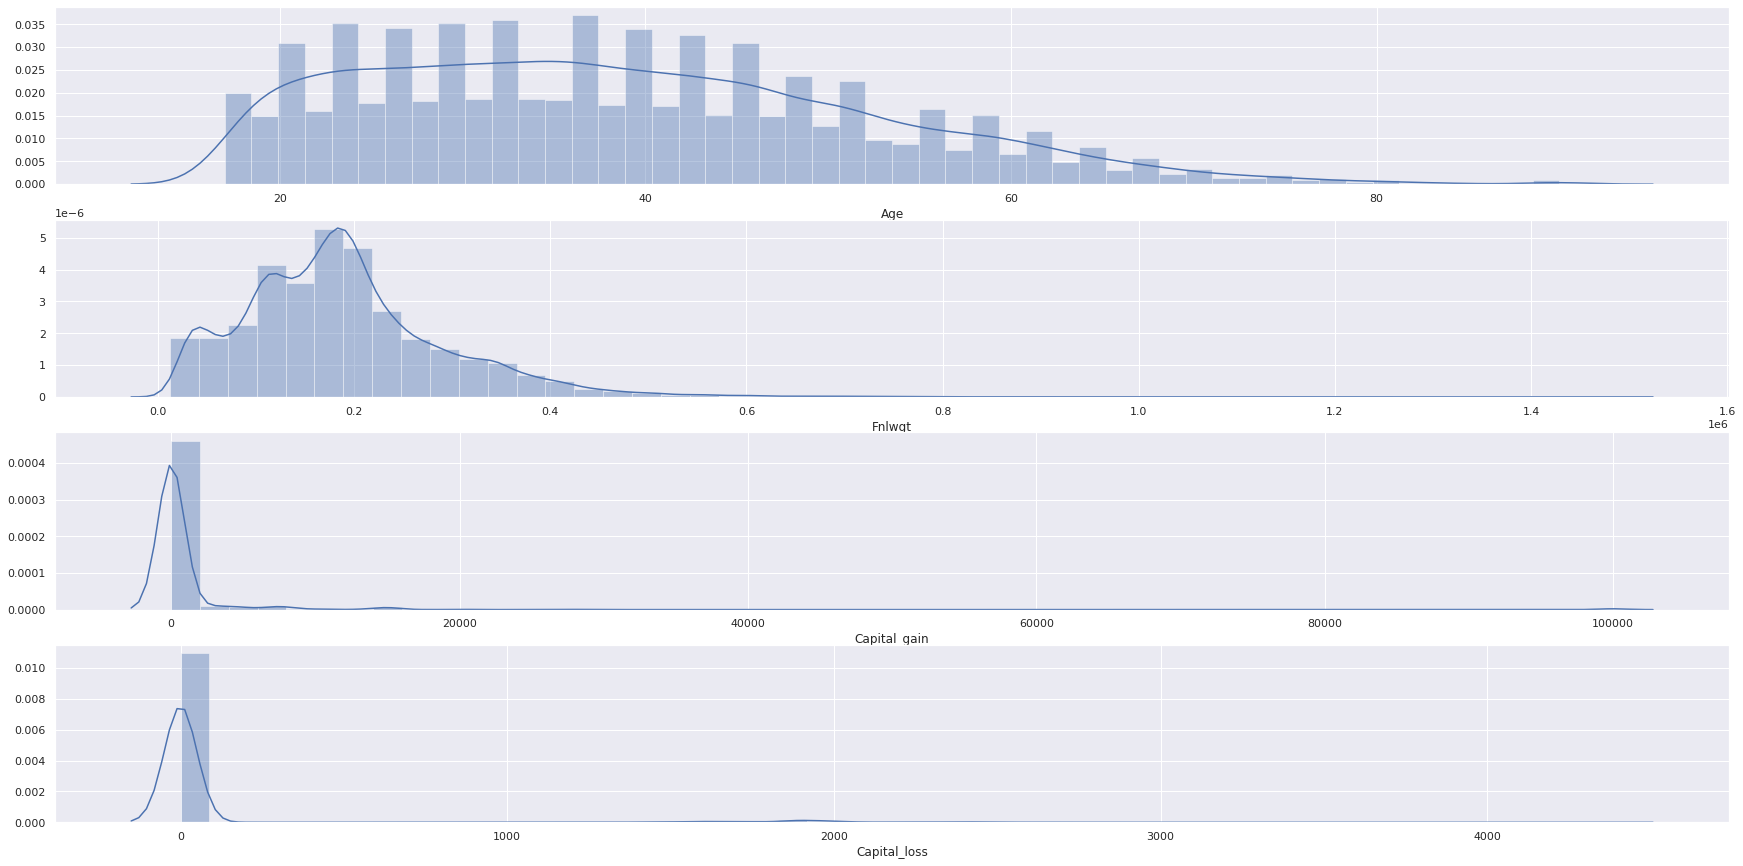

In [15]:
sns.set()
fig,axes= plt.subplots(4,figsize=(30,15))
sns.distplot(x["Age"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(x["Fnlwgt"],ax=axes[1])
axes[1].set_ylabel("")
sns.distplot(x["Capital_gain"],ax=axes[2])
axes[2].set_ylabel("")
sns.distplot(x["Capital_loss"],ax=axes[3])
axes[3].set_ylabel("")

- Age and Fnlwgt contain discrete datatype.

In [16]:
from sklearn.preprocessing import power_transform
list4=["Fnlwgt","Age","Capital_gain","Capital_loss"]
for i in list4:
  x[i]=power_transform(x[i].values.reshape(-1,1))

Text(0, 0.5, '')

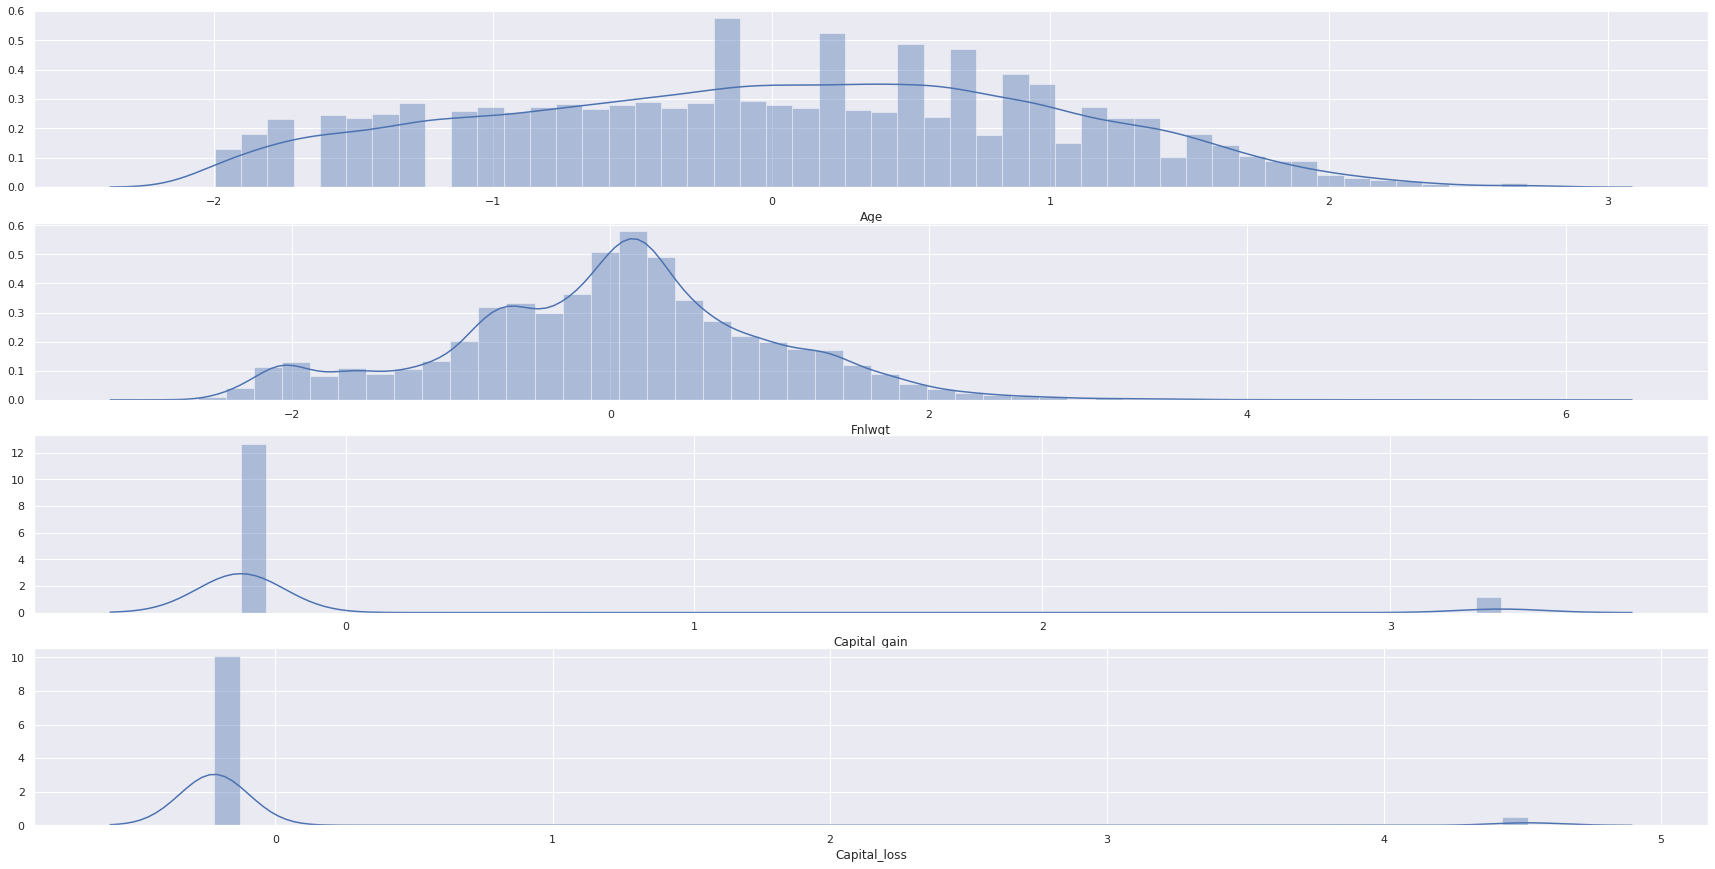

In [17]:
sns.set()
fig,axes= plt.subplots(4,figsize=(30,15))
sns.distplot(x["Age"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(x["Fnlwgt"],ax=axes[1])
axes[1].set_ylabel("")
sns.distplot(x["Capital_gain"],ax=axes[2])
axes[2].set_ylabel("")
sns.distplot(x["Capital_loss"],ax=axes[3])
axes[3].set_ylabel("")

- Age and Fnlwgt contain discrete datatype.

In [18]:
x.skew().sort_values()

Native_country   -4.243083
Race             -2.435332
Education        -0.934063
Sex              -0.719244
Education_num    -0.311630
Age              -0.013897
Marital_status   -0.013448
Occupation        0.000536
Fnlwgt            0.016914
Workclass         0.076178
Hours_per_week    0.227636
Relationship      0.786784
Capital_gain      3.016951
Capital_loss      4.299511
dtype: float64

- We drop Capital_gain and Capital_loss since the skewness doesnt reduce any further and is not in range +/-0.5 

In [19]:
x2=x.drop(["Capital_gain","Capital_loss"],axis=1)
x2.skew().sort_values()

Native_country   -4.243083
Race             -2.435332
Education        -0.934063
Sex              -0.719244
Education_num    -0.311630
Age              -0.013897
Marital_status   -0.013448
Occupation        0.000536
Fnlwgt            0.016914
Workclass         0.076178
Hours_per_week    0.227636
Relationship      0.786784
dtype: float64

# Detecting Outliers

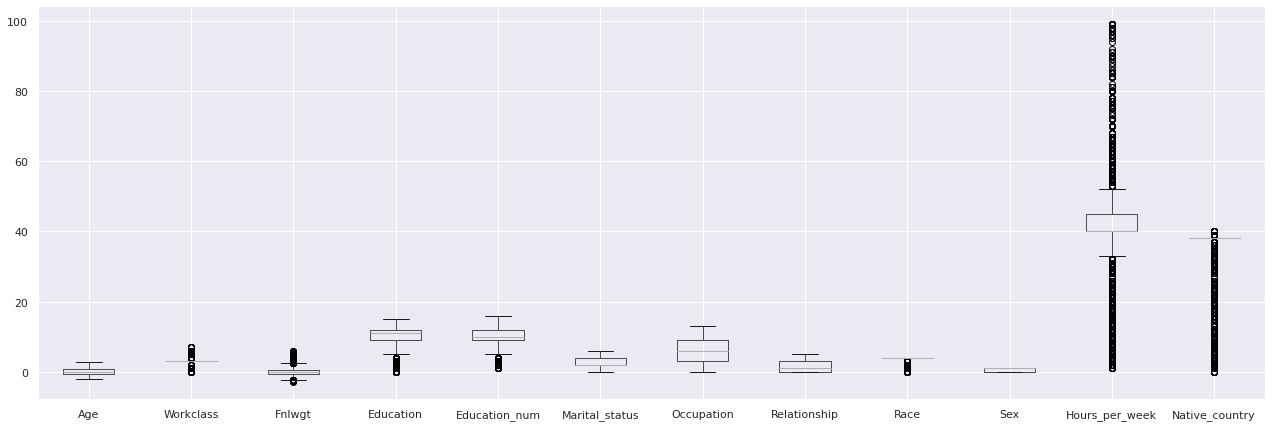

In [20]:
x2.iloc[:,:df.shape[1]].boxplot(figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

Only following are non categorical features whose outliers can be removed
- Fnlwgt
- Hours per week


In [21]:
df=x2.copy()
new_df_cap=df.copy()

In [22]:
def remove_outliers(n):
  Q3=np.percentile(df[n],75,interpolation='midpoint')
  Q1=np.percentile(df[n],25,interpolation='midpoint')
  iqr=Q3-Q1
  percentile75=df[n].quantile(0.75)
  percentile25=df[n].quantile(0.25)
  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr
  df[df[n]>upper_limit]
  df[df[n]<lower_limit]
  
  new_df=df[df[n]<upper_limit]

  new_df_cap[n]=np.where(
      new_df_cap[n]>upper_limit,
      upper_limit,
      np.where(
          new_df_cap[n]<lower_limit,
          lower_limit,
          new_df_cap[n] ) 
      )
  sns.boxplot(new_df_cap[n])

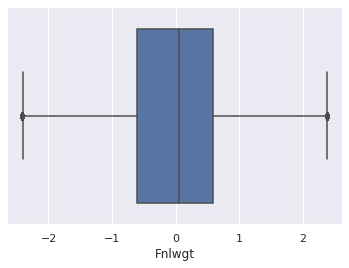

In [23]:
remove_outliers("Fnlwgt")


In [24]:
from scipy.stats import zscore
z=np.abs(zscore(new_df_cap.iloc[:,2]))
print(np.where(z>3))


(array([], dtype=int64),)


- No Outliers present in feature Fnlwgt

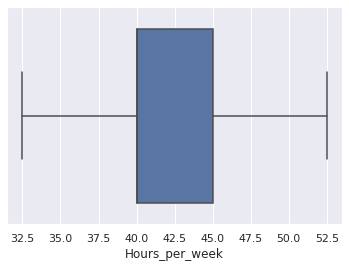

In [25]:
remove_outliers("Hours_per_week")

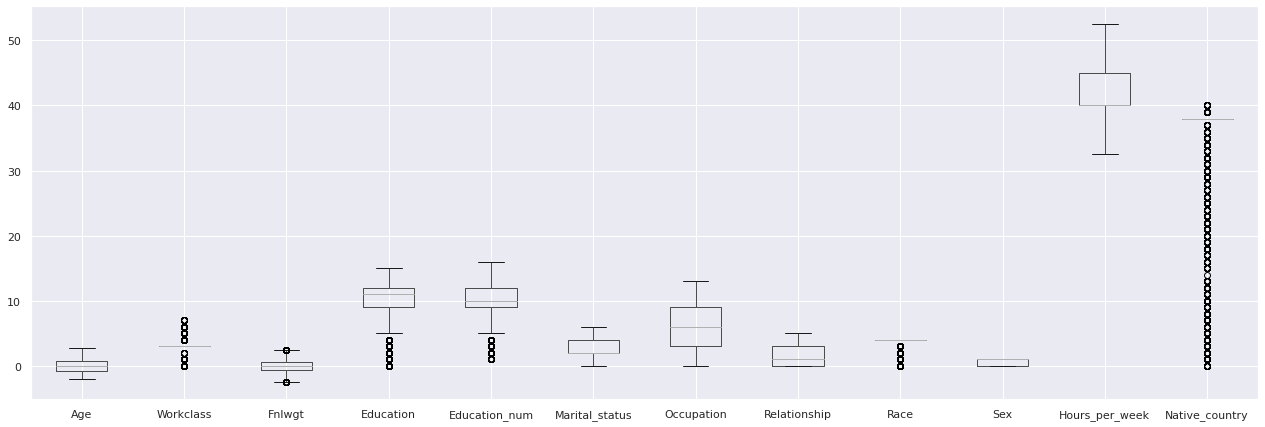

In [26]:
new_df_cap.iloc[:,:df.shape[1]].boxplot(figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Detecting Collinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
calc_vif(new_df_cap)

,variables,VIF
0,Age,1.192250
1,Workclass,8.502577
2,Fnlwgt,1.009216
3,Education,9.246749
4,Education_num,19.214661
5,Marital_status,4.272205
6,Occupation,3.387426
7,Relationship,2.768929
8,Race,18.369279
9,Sex,4.638693


- Only non categorical feature Hours_per_week has VIF>5, indicating collinearity and hence we decide to drop it.

In [29]:
X=new_df_cap.drop(["Hours_per_week"],axis=1)
calc_vif(X)

,variables,VIF
0,Age,1.181700
1,Workclass,8.197261
2,Fnlwgt,1.008908
3,Education,9.196469
4,Education_num,17.408435
5,Marital_status,4.263661
6,Occupation,3.371717
7,Relationship,2.750873
8,Race,17.091280
9,Sex,4.317862


# Oversampling

In [30]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y_new=smt.fit_resample(X,y)
y=y_new
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

# Traning and Testing

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [33]:
mns=MinMaxScaler()
s=mns.fit_transform(x_new)
xs=pd.DataFrame(data=s)
print(xs)

             0         1         2         3         4         5         6   \
0      0.613586  0.714286  0.275719  0.600000  0.800000  0.333333  0.230769   
1      0.445963  0.428571  0.586704  0.733333  0.533333  0.000000  0.384615   
2      0.650209  0.428571  0.620923  0.066667  0.400000  0.333333  0.384615   
3      0.268750  0.428571  0.783422  0.600000  0.800000  0.333333  0.692308   
4      0.430098  0.428571  0.703366  0.800000  0.866667  0.333333  0.230769   
...         ...       ...       ...       ...       ...       ...       ...   
49433  0.613586  0.428571  0.727961  1.000000  0.600000  0.333333  0.153846   
49434  0.425877  0.857143  0.413200  0.666667  1.000000  0.333333  0.692308   
49435  0.418809  0.428571  0.456843  1.000000  0.600000  0.333333  0.923077   
49436  0.307374  0.428571  0.474994  0.800000  0.866667  0.333333  0.692308   
49437  0.541560  0.714286  0.878336  0.600000  0.800000  0.333333  0.692308   

        7    8    9     10  
0      0.0  1.0  1.0  

#PCA

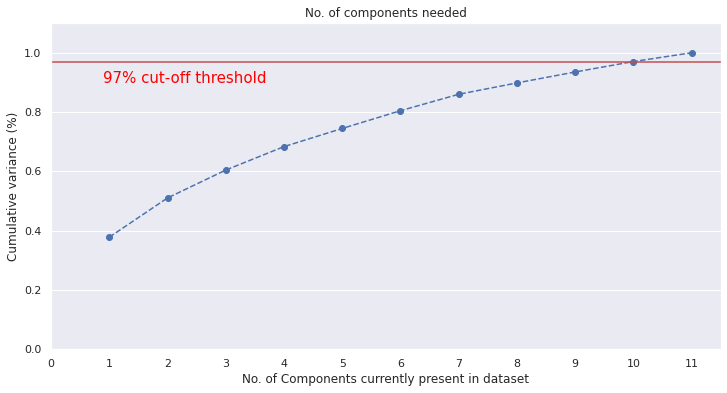

In [34]:
from sklearn.decomposition import PCA
pca = PCA().fit(xs)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
a = np.arange(1, 12, step=1)
b = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(a, b, marker='o', linestyle='--', color='b')

plt.xlabel('No. of Components currently present in dataset')
plt.xticks(np.arange(0, 12, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('No. of components needed')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.90, 0.90, '97% cut-off threshold', color = 'red', fontsize=15)
ax.grid(axis='x')
plt.show()

In [35]:
pca = PCA(n_components = 10)
pca.fit(xs)
x = pca.transform(xs)
x.shape

(49438, 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
for i in range(0,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  lg.fit(x_train,y_train)
  pred_train=lg.predict(x_train)
  pred_test=lg.predict(x_test)
  if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print("At random state",i)
    print("Train Accuracy: ",round(accuracy_score(y_train,pred_train)))
    print("Test Accuracy: ",round(accuracy_score(y_test,pred_test)))
    print("\n")

At random state 5
Train Accuracy:  1
Test Accuracy:  1


At random state 16
Train Accuracy:  1
Test Accuracy:  1


At random state 29
Train Accuracy:  1
Test Accuracy:  1


At random state 32
Train Accuracy:  1
Test Accuracy:  1


At random state 39
Train Accuracy:  1
Test Accuracy:  1


At random state 50
Train Accuracy:  1
Test Accuracy:  1


At random state 56
Train Accuracy:  1
Test Accuracy:  1


At random state 59
Train Accuracy:  1
Test Accuracy:  1


At random state 69
Train Accuracy:  1
Test Accuracy:  1


At random state 76
Train Accuracy:  1
Test Accuracy:  1




In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Train Accuracy: ",round(accuracy_score(y_train,pred_train)))
print("Test Accuracy: ",round(accuracy_score(y_test,pred_test)))

Train Accuracy:  1
Test Accuracy:  1


# Cross Validation

In [ ]:
ls=accuracy_score(y_test,pred_test)
for j in range(2,20):
  cv_score=cross_val_score(lg,x,y,cv=j)
  print(cv_score)
  cv_mean=cv_score.mean()
  print("At cv:",j)
  print("cv score:",cv_mean*100)
  print("accuracy:",ls*100)
  print("\n")

[0.74007848 0.74080667]
At cv: 2
cv score: 74.04425745378049
accuracy: 73.7864077669903


[0.74199029 0.73985072 0.74021482]
At cv: 3
cv score: 74.06852764065121
accuracy: 73.7864077669903


[0.73956311 0.74166667 0.73913747 0.74285945]
At cv: 4
cv score: 74.08066746950914
accuracy: 73.7864077669903


[0.73695388 0.74332524 0.74170712 0.74097299 0.74066957]
At cv: 5
cv score: 74.07257613786598
accuracy: 73.7864077669903


[0.73725728 0.74417476 0.73956311 0.74126214 0.74147348 0.7395315 ]
At cv: 6
cv score: 74.05437096475795
accuracy: 73.7864077669903


[0.73467365 0.74656661 0.73552315 0.74557553 0.73945058 0.74384027
 0.74100821]
At cv: 7
cv score: 74.09482878393524
accuracy: 73.7864077669903


[0.72928803 0.75032362 0.74255663 0.74158576 0.74126214 0.73527508
 0.74591358 0.73944004]
At cv: 8
cv score: 74.07056099032583
accuracy: 73.7864077669903


[0.72843102 0.74585837 0.74822501 0.73566357 0.74731476 0.74003277
 0.73894047 0.74367377 0.73784817]
At cv: 9
cv score: 74.0665322915717

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4990
           1       0.72      0.76      0.74      4898

    accuracy                           0.74      9888
   macro avg       0.74      0.74      0.74      9888
weighted avg       0.74      0.74      0.74      9888



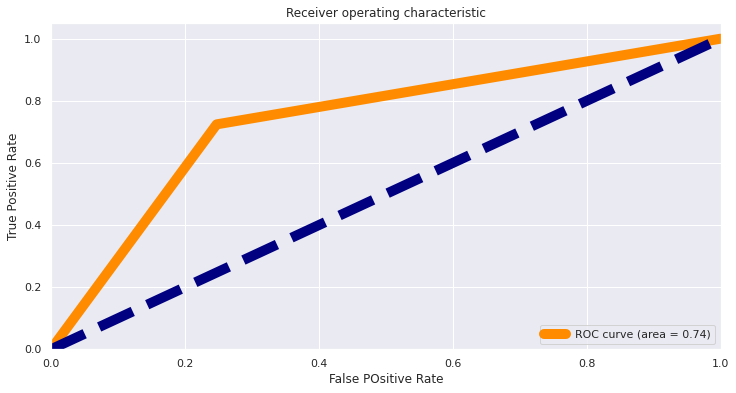

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

# Model Selection

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    rfscore=cross_val_score(algorithm_instance,x,y,cv=15)
    rfc=rfscore.mean()
    print('Cross Val Score:',round(rfc*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   

    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()

#KNeighborsClassifier

Accuracy of training model : 87.97
Accuracy of test data : 83.21
Cross Val Score: 83.61

Classification report for test data
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      4990
           1       0.79      0.90      0.84      4898

    accuracy                           0.83      9888
   macro avg       0.84      0.83      0.83      9888
weighted avg       0.84      0.83      0.83      9888

Classification report for training data
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     19729
           1       0.84      0.94      0.89     19821

    accuracy                           0.88     39550
   macro avg       0.89      0.88      0.88     39550
weighted avg       0.89      0.88      0.88     39550

Confusion Matrix
 [[3807 1183]
 [ 477 4421]]




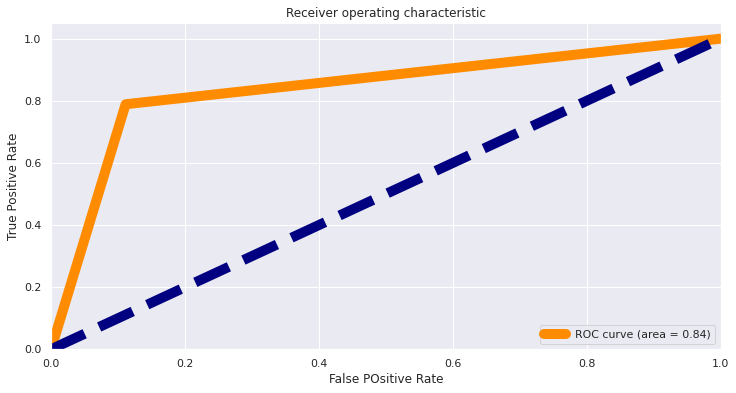

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC

Accuracy of training model : 81.12
Accuracy of test data : 80.73
Cross Val Score: 80.78

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      5000
           1       0.76      0.88      0.82      4888

    accuracy                           0.81      9888
   macro avg       0.81      0.81      0.81      9888
weighted avg       0.82      0.81      0.81      9888

Classification report for training data
               precision    recall  f1-score   support

           0       0.86      0.74      0.80     19719
           1       0.77      0.88      0.82     19831

    accuracy                           0.81     39550
   macro avg       0.82      0.81      0.81     39550
weighted avg       0.82      0.81      0.81     39550

Confusion Matrix
 [[3666 1334]
 [ 571 4317]]




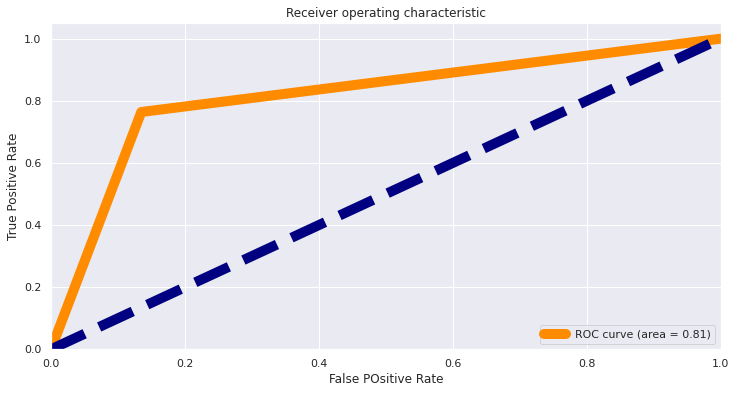

In [37]:
from sklearn import svm
s=svm.SVC(probability=True)
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier 

Accuracy of training model : 99.97
Accuracy of test data : 80.42
Cross Val Score: 80.42

Classification report for test data
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      4990
           1       0.79      0.82      0.81      4898

    accuracy                           0.80      9888
   macro avg       0.80      0.80      0.80      9888
weighted avg       0.80      0.80      0.80      9888

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19729
           1       1.00      1.00      1.00     19821

    accuracy                           1.00     39550
   macro avg       1.00      1.00      1.00     39550
weighted avg       1.00      1.00      1.00     39550

Confusion Matrix
 [[3921 1069]
 [ 867 4031]]




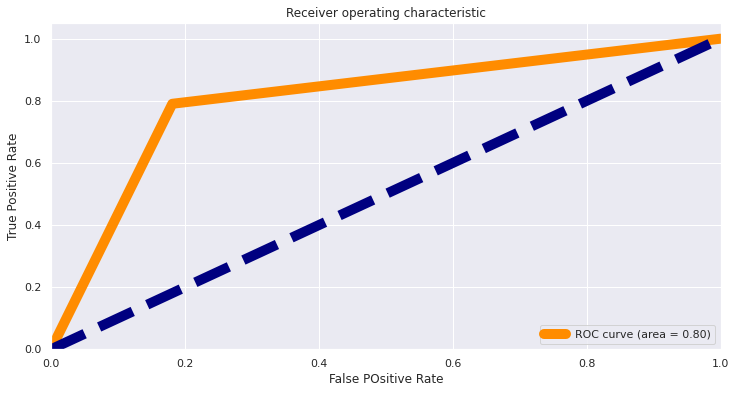

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,100,50)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50, 'oob_score': 'True'}


Accuracy of training model : 99.94
Accuracy of test data : 84.79
Cross Val Score: 85.43

Classification report for test data
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      4966
           1       0.83      0.87      0.85      4922

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19753
           1       1.00      1.00      1.00     19797

    accuracy                           1.00     39550
   macro avg       1.00      1.00      1.00     39550
weighted avg       1.00      1.00      1.00     39550

Confusion Matrix
 [[4109  857]
 [ 647 4275]]




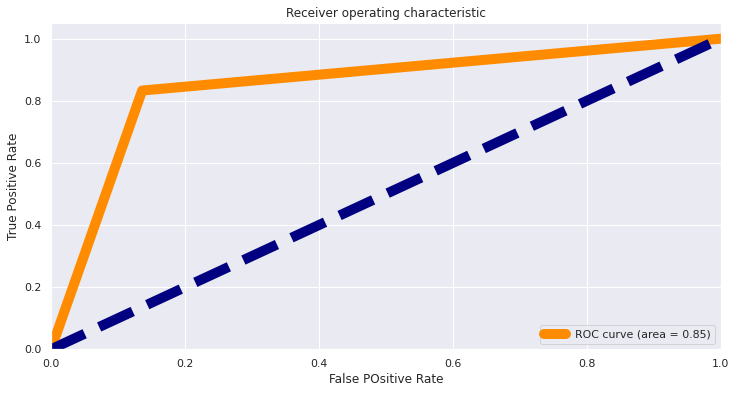

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, class_weight= 'balanced',criterion='gini', max_features='sqrt', oob_score= 'True')
model_selection(rf,x_train,y_train,x_test,y_test)

# AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0],
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 75, 'random_state': 0}


Accuracy of training model : 79.89
Accuracy of test data : 79.54
Cross Val Score: 79.5

Classification report for test data
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      4966
           1       0.78      0.82      0.80      4922

    accuracy                           0.80      9888
   macro avg       0.80      0.80      0.80      9888
weighted avg       0.80      0.80      0.80      9888

Classification report for training data
               precision    recall  f1-score   support

           0       0.82      0.76      0.79     19753
           1       0.78      0.83      0.81     19797

    accuracy                           0.80     39550
   macro avg       0.80      0.80      0.80     39550
weighted avg       0.80      0.80      0.80     39550

Confusion Matrix
 [[3809 1157]
 [ 866 4056]]




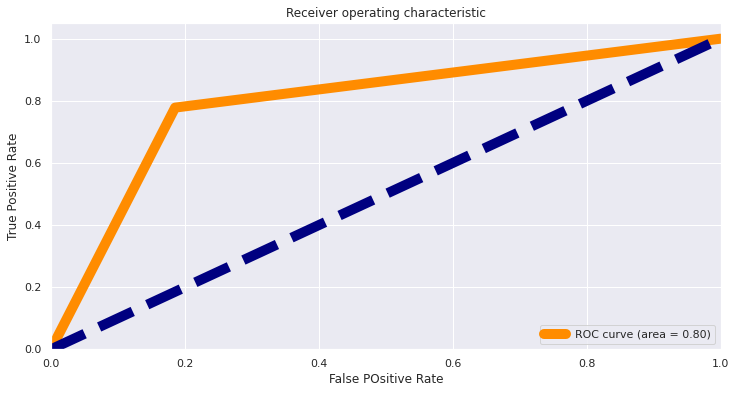

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
rf2=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.0, n_estimators= 75,random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)


# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,50)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'deviance', 'max_features': 'log2', 'n_estimators': 50}


Accuracy of training model : 82.58
Accuracy of test data : 81.15
Cross Val Score: 81.09

Classification report for test data
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      4966
           1       0.79      0.85      0.82      4922

    accuracy                           0.81      9888
   macro avg       0.81      0.81      0.81      9888
weighted avg       0.81      0.81      0.81      9888

Classification report for training data
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     19753
           1       0.80      0.86      0.83     19797

    accuracy                           0.83     39550
   macro avg       0.83      0.83      0.83     39550
weighted avg       0.83      0.83      0.83     39550

Confusion Matrix
 [[3847 1119]
 [ 745 4177]]




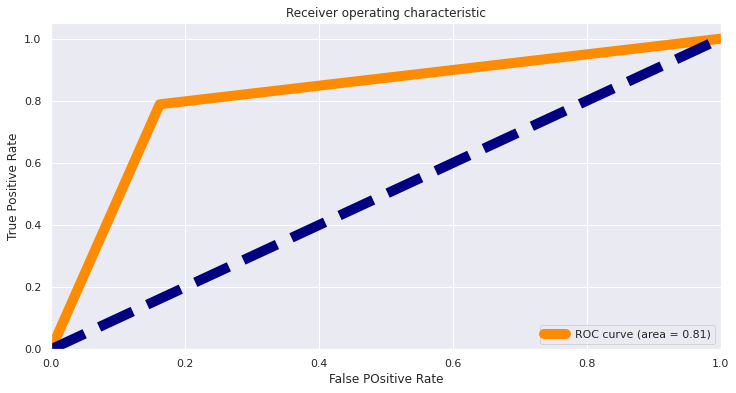

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0, loss='deviance', max_features= 'log2', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameter={
           'oob_score': [True,False],
           'n_jobs':range(0,100,25),
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 75, 'n_jobs': 25, 'oob_score': True, 'random_state': 25}


Accuracy of training model : 99.97
Accuracy of test data : 84.45
Cross Val Score: 85.28

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      5000
           1       0.82      0.88      0.85      4888

    accuracy                           0.84      9888
   macro avg       0.85      0.84      0.84      9888
weighted avg       0.85      0.84      0.84      9888

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19719
           1       1.00      1.00      1.00     19831

    accuracy                           1.00     39550
   macro avg       1.00      1.00      1.00     39550
weighted avg       1.00      1.00      1.00     39550

Confusion Matrix
 [[4057  943]
 [ 595 4293]]




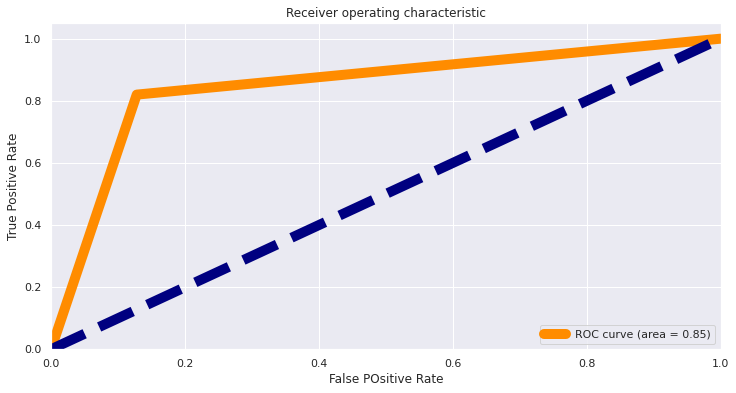

In [38]:
from sklearn.ensemble import BaggingClassifier
rf4=BaggingClassifier(n_jobs=25, oob_score= True, random_state=25, n_estimators= 75)
model_selection(rf4,x_train,y_train,x_test,y_test)


# StackingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,50)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 50, 'stack_method': 'auto'}


Accuracy of training model : 87.12
Accuracy of test data : 83.41
Cross Val Score: 83.93

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      4966
           1       0.81      0.88      0.84      4922

    accuracy                           0.83      9888
   macro avg       0.84      0.83      0.83      9888
weighted avg       0.84      0.83      0.83      9888

Classification report for training data
               precision    recall  f1-score   support

           0       0.90      0.83      0.87     19753
           1       0.84      0.91      0.88     19797

    accuracy                           0.87     39550
   macro avg       0.87      0.87      0.87     39550
weighted avg       0.87      0.87      0.87     39550

Confusion Matrix
 [[3926 1040]
 [ 600 4322]]




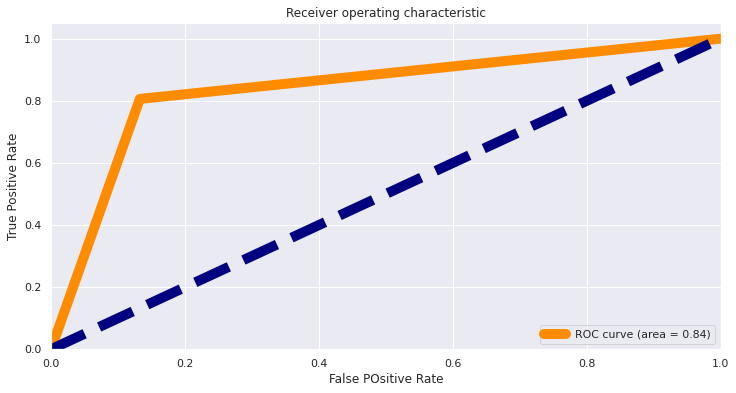

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
rf5=StackingClassifier(estimators,n_jobs=50, stack_method= 'auto')
model_selection(rf5,x_train,y_train,x_test,y_test)

# Model Saving

In [39]:
import pickle
filename='r.pk1'
pickle.dump(rf4,open(filename,'wb'))

We selected Bagging Classifier model since
- it has best cross validation score among all the model and high accuracy.
- highest auc score of 0.85

# Loading Model

In [40]:
loaded_model=pickle.load(open('r.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.44579288025889


# Testing Loaded Model

In [41]:
def test_inp():
  inp = []
  i=0
  print("Enter single input\n")
  while i<10:
    inn=float(input(f"Enter input {i+1}: "))
    inp.append(inn)
    i=i+1
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  if prediction[0]==0:
      print("\nIncome <= 50k")
  if prediction[0]==1:
      print("\nIncome > 50k")

In [42]:
X=pd.DataFrame(x)
Y=pd.DataFrame(y)
print("Input 1st row \n",X.head(1),"\n\nOutput\n",Y.head(1))
print("\n\n")
print("Input nth row \n",X.tail(1),"\n\nOutput nth row\n",Y.tail(1))

Input 1st row 
           0         1         2         3         4        5         6  \
0 -0.379297 -0.256303 -0.079095  0.147172 -0.053593 -0.09824  0.220185   

          7         8         9  
0  0.195391 -0.139817 -0.187328   

Output
    Income
0       0



Input nth row 
               0         1        2         3         4         5         6  \
49437 -0.396975  0.212894 -0.01583  0.082056 -0.008691 -0.014251 -0.362933   

             7         8         9  
49437  0.21563 -0.163183 -0.180069   

Output nth row
        Income
49437       1


In above table we have seen that 
- Input 0th row gives output 0 i.e Income<=50k
-Input nth row gives output 1 i.e Income>50k

So we can use this input data with loaded model to test if model gives correct output

In [43]:
test_inp()

Enter single input

Enter input 1: -0.379297  
Enter input 2: -0.256303 
Enter input 3: -0.079095  
Enter input 4: 0.147172 
Enter input 5: -0.053593 
Enter input 6: -0.09824  
Enter input 7: 0.220185
Enter input 8: 0.195391 
Enter input 9: -0.139817 
Enter input 10: -0.187328

Income <= 50k


In [44]:
test_inp()

Enter single input

Enter input 1: -0.396975  
Enter input 2: 0.212894 
Enter input 3: -0.01583  
Enter input 4: 0.082056 
Enter input 5: -0.008691 
Enter input 6: -0.014251 
Enter input 7: -0.362933
Enter input 8: 0.21563 
Enter input 9: -0.163183 
Enter input 10: -0.180069

Income > 50k
